https://paddlepedia.readthedocs.io/
## Softmax 回归

Softmax回归是逻辑回归 (Logistic Regression) 的推广，逻辑回归适用于二元分类的问题，而Softmax回归适用于多分类的问题。

与线性回归一样，softmax回归也是一个单层神经网络。 由于计算每个输出$o_1$、$o_2$和$o_3$取决于 所有输入$x_1$、$x_2$、$x_3$和$x_4$， 所以softmax回归的输出层也是全连接层。

![softmaxreg.svg](https://raw.githubusercontent.com/Ascotbe/Image/master/SoftmaxRegression/1.svg)


![img](https://raw.githubusercontent.com/Ascotbe/Image/master/SoftmaxRegression/2.png)

![img](https://raw.githubusercontent.com/Ascotbe/Image/master/SoftmaxRegression/3.png)



Softmax回归是使用Softmax运算使得最后一层输出的机率分布总和为1，举一个例子，假设我们要辨识手写数字0~9，输入一张数字的影像后，经由Softmax 回归，最后将会输出该影像属于0 ~ 9 个别的机率为何，且其个别的机率总和为1。

$$\hat{\mathbf{y}}=\operatorname{softmax}(\mathbf{o}) \quad \text { 其中 } \quad \hat{y}_{j}=\frac{\exp \left(o_{j}\right)}{\sum_{k} \exp \left(o_{k}\right)}$$

Softmax 函数通常会放在类神经网路的最后一层，将最后一层所有节点的输出都通过指数函数 (exponential function)，并将结果相加作为分母，个别的输出作为分子。

![img](https://raw.githubusercontent.com/Ascotbe/Image/master/SoftmaxRegression/4.jpeg)

### 实际计算举例

$$\left[\begin{array}{c}
1.4 \\
-0.1 \\
0.3
\end{array}\right] \rightarrow \operatorname{softmax} \rightarrow\left[\begin{array}{c}
\frac{\mathrm{e}^{1.4}}{\mathrm{e}^{1.4}+\mathrm{e}^{-0.1}+\mathrm{e}^{0.3}} \\
\frac{\mathrm{e}^{-0.1}}{\mathrm{e}^{1.4}+\mathrm{e}^{-0.1}+\mathrm{e}^{0.3}} \\
\frac{\mathrm{e}^{0.3}}{\mathrm{e}^{1.4}+\mathrm{e}^{-0.1}+\mathrm{e}^{0.3}}
\end{array}\right]=\left[\begin{array}{l}
0.643 \\
0.143 \\
0.214
\end{array}\right]$$


## 手写辨识实作

手写辨识是一个非常经典的深度学习入门范例，该范例是输入一张手写数字 0 ~ 9 的影像，并且通过类神经网路预测该影像为 0 ~ 9 哪一个数字。

![img](https://raw.githubusercontent.com/Ascotbe/Image/master/SoftmaxRegression/5.png)



在Softmax 回归这个例子中，我们使用的是TensorFlow 官方提供的MNIST 资料集，MNIST 资料集中的影像是28 x 28 = 784 的手写数字影像，如果将其中一张影像的像素(pixels) 以矩阵的方式呈现，可以看到那些数值所呈现的形状即是手写数字的形状，所以我们将利用这些数值来预测手写数字。

![img](https://raw.githubusercontent.com/Ascotbe/Image/master/SoftmaxRegression/6.png)

## 什么是One-hot encoding？

One-Hot编码: 一种简单的单词编码方式。在NLP领域，如何将单词数值化呢，One-Hot编码就是一种很简单的方式。假设我们现在有单词数量为$N$的词表，那可以生成一个长度为$N$
的向量来表示一个单词，在这个向量中该单词对应的位置数值为1，其余单词对应的位置数值全部为0。举例如下：

词典: [queen, king, man, woman, boy, girl ]

![image.png](https://raw.githubusercontent.com/Ascotbe/Image/master/SoftmaxRegression/7.png)



## 导入数据集

本节我们将使用Fashion-MNIST数据集， 并设置数据迭代器的批量大小为256



In [49]:
import torch
from IPython import display
from d2l import torch as d2l

batch_size = 256 #每次返回256张图片
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
print(train_iter)


## 定义类神经网路模型

Fashion-MNIST的影像是28(width)×28(height)=784(pixels)。本节将展平每个图像，把它们看作长度为784的向量。 在后面的章节中，我们将讨论能够利用图像空间结构的特征， 但现在我们暂时只把每个像素位置看作一个特征。

回想一下，在softmax回归中，我们的输出与类别一样多。因为我们的数据集有10个类别，所以网络输出维度为10。因此，权重将构成一个$784*10$
的矩阵， 偏置将构成一个$1*10$的行向量。与线性回归一样，我们将使用正态分布初始化我们的权重$W$，偏置初始化为0。

In [2]:
num_inputs = 784
num_outputs = 10

W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)
print(W)
print(b)

tensor([[ 1.5018e-02,  1.6499e-02,  1.3063e-02,  ...,  9.3903e-03,
          2.9487e-03, -1.0379e-02],
        [-2.3555e-04,  3.4315e-03,  2.1076e-02,  ..., -1.0851e-03,
          3.4873e-03,  9.5387e-03],
        [ 1.0830e-02, -1.3425e-03, -1.1698e-02,  ...,  6.3264e-03,
          4.5914e-03,  1.2329e-02],
        ...,
        [ 1.5727e-02, -3.6981e-05,  1.5651e-02,  ..., -3.0547e-03,
          2.2678e-03,  2.2194e-02],
        [ 2.4542e-03,  5.8998e-03, -4.0210e-03,  ...,  4.3958e-03,
         -9.6807e-03, -7.4245e-03],
        [ 1.5023e-02,  1.2167e-03, -2.9214e-03,  ..., -1.0596e-02,
          1.8431e-02, -1.4767e-02]], requires_grad=True)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)


## 定义softmax操作
 给定一个矩阵X，我们可以对所有元素求和（默认情况下）。 也可以只求同一个轴上的元素，即同一列（轴0）或同一行（轴1）。 如果X是一个形状为(2, 3)的张量，我们对列进行求和， 则结果将是一个具有形状(3,)的向量。 当调用sum运算符时，我们可以指定保持在原始张量的轴数，而不折叠求和的维度。 这将产生一个具有形状(1, 3)的二维张量。

In [33]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])

#torch.sum(input, list: dim, bool: keepdim=False, dtype=None) → Tensor　
#input:输入一个tensor
#dim:要求和的维度，可以是一个列表
#keepdim:是否保持求和维度个维度，如果需要保持应当keepdim=True 

print(X,"\n",X.shape,"\n--------------------")
print(X.sum(0, keepdim=True),"\n",X.sum(0, keepdim=True).shape,"\n--------------------")
print(X.sum(1, keepdim=True),"\n",X.sum(1, keepdim=True).shape,"\n--------------------")
print(X.sum(1),"\n",X.sum(1).shape)

tensor([[1., 2., 3.],
        [4., 5., 6.]]) 
 torch.Size([2, 3]) 
--------------------
tensor([[5., 7., 9.]]) 
 torch.Size([1, 3]) 
--------------------
tensor([[ 6.],
        [15.]]) 
 torch.Size([2, 1]) 
--------------------
tensor([ 6., 15.]) 
 torch.Size([2])


回想一下，**实现softmax**由三个步骤组成：

1. 对每个项求幂（使用`exp`）；
1. 对每一行求和（小批量中每个样本是一行），得到每个样本的规范化常数；
1. 将每一行除以其规范化常数，确保结果的和为1。

在查看代码之前，我们回顾一下这个表达式：

$$
\mathrm{softmax}(\mathbf{X})_{ij} = \frac{\exp(\mathbf{X}_{ij})}{\sum_k \exp(\mathbf{X}_{ik})}.
$$

分母或规范化常数，有时也称为*配分函数*（其对数称为对数-配分函数）。
该名称来自[统计物理学](https://en.wikipedia.org/wiki/Partition_function_(statistical_mechanics))中一个模拟粒子群分布的方程。

In [4]:
def softmax(X):
    X_exp = torch.exp(X)
    #print(X_exp)
    partition = X_exp.sum(1, keepdim=True) #如果有keepdim那么就是列的维度
    #print(partition)
    return X_exp / partition  # 这里应用了广播机制

正如上述代码，对于任何随机输入，我们将每个元素变成一个非负数。 此外，依据概率原理，每行总和为1。

官方文档：https://pytorch.org/docs/1.2.0/torch.html#torch.exp

 torch.exp的用法样例可以参考下面内容，常数$e$等于2.704

In [42]:

def softmax_test(X):
    print(f"X等于:{X}")
    X_exp = torch.exp(X)
    print(f"X_exp等于:{X_exp}")
    partition = X_exp.sum(1, keepdim=True) #如果有keepdim那么就是列的维度
    print(f"partition等于:{partition}")
    return X_exp / partition  # 这里应用了广播机制
ccccc=torch.exp(torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]))
print(f"ccccc等于:{ccccc}")
X = torch.normal(0, 1, (2, 5))
X_prob = softmax_test(X)
X_prob, X_prob.sum(1)

ccccc等于:tensor([[  2.7183,   7.3891,  20.0855],
        [ 54.5982, 148.4132, 403.4288]])
X等于:tensor([[ 0.1136,  0.1070,  0.7513, -1.6653,  1.0956],
        [-1.2548, -0.6776, -0.5557, -0.1125, -0.5532]])
X_exp等于:tensor([[1.1203, 1.1129, 2.1197, 0.1891, 2.9909],
        [0.2851, 0.5078, 0.5737, 0.8936, 0.5751]])
partition等于:tensor([[7.5329],
        [2.8353]])


(tensor([[0.1487, 0.1477, 0.2814, 0.0251, 0.3970],
         [0.1006, 0.1791, 0.2023, 0.3152, 0.2028]]),
 tensor([1., 1.]))

注意，虽然这在数学上看起来是正确的，但我们在代码实现中有点草率。 矩阵中的非常大或非常小的元素可能造成数值上溢或下溢，但我们没有采取措施来防止这点。

## 定义模型
定义softmax操作后，我们可以实现softmax回归模型。 下面的代码定义了输入如何通过网络映射到输出。 注意，将数据传递到模型之前，我们使用reshape函数将每张原始图像展平为向量。

In [7]:
def net(X):
    return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)

## 定义损失函数
接下来，我们实现交叉熵损失函数。 这可能是深度学习中最常见的损失函数，因为目前分类问题的数量远远超过回归问题的数量。

交叉熵损失函数：https://blog.csdn.net/b1055077005/article/details/100152102

底是10的对数叫：常用对数 $\log_{10}(x)$，有时写为$\log(x)$

### 交叉熵损失函数原理详解

之前在代码中经常看见交叉熵**损失函数**(CrossEntropy Loss)，只知道它是分类问题中经常使用的一种损失函数，对于其内部的原理总是模模糊糊，而且一般使用交叉熵作为损失函数时，在模型的输出层总会接一个softmax函数，至于为什么要怎么做也是不懂，所以专门花了一些时间打算从原理入手，搞懂它，故在此写一篇博客进行总结，以便以后翻阅。



#### 交叉熵简介

交叉熵是信息论中的一个重要概念，主要用于度量两个概率分布间的差异性，要理解交叉熵，需要先了解下面几个概念。



#### 信息量
信息奠基人香农（Shannon）认为“信息是用来**消除**随机**不确定性**的东西”，也就是说衡量信息量的大小就是看这个信息消除不确定性的程度。

- “太阳从东边升起”，这条信息并没有减少不确定性，因为太阳肯定是从东边升起的，这是一句废话，信息量为0。

- “2018年中国队成功进入世界杯”，从直觉上来看，这句话具有很大的信息量。因为中国队进入世界杯的不确定性因素很大，而这句话消除了进入世界杯的不确定性，所以按照定义，这句话的信息量很大。

根据上述可总结如下：**信息量的大小与信息发生的概率成反比**。概率越大，信息量越小。概率越小，信息量越大。

设某一事件发生的概率为$P(x)$，其信息量表示为：

$$\mathrm{I}(\mathrm{x})=-\log (\mathrm{P}(\mathrm{x}))$$


其中$I(x)$表示信息量，这里$\log$表示以$e$为底的自然对数。

#### 信息熵

信息摘也被称为熵，用来表示所有信息量的期望。
期望是试验中每次可能结果的概率乘以其结果的总和。
所以信息量的摘可表示为：（这里的$\mathrm{X}$是一个离散型随机变量）

$$\mathrm{H}(\mathbf{X}) = -\sum_{\mathrm{i} = 1}^{\mathrm{n}} \mathrm{P}(\mathrm{x}_{\mathrm{i}}) \log (\mathrm{P}(\mathrm{x}_{\mathrm{i}}))\quad\left(\mathbf{X} = \mathrm{x}_{1}, \mathrm{x}_{2}, \mathrm{x}_{3} \ldots, \mathrm{x}_{\mathrm{n}}\right)$$


使用明天的天气概率来计算其信息熵:

| 序号 | 事件       | 概率P | 信息量       |
| ---- | ---------- | ----- | ------------ |
| 1    | 明天是晴天 | 0.5   | -log(0.5) |
| 2    | 明天出雨天 | 0.2   | -log(0.2) |
| 3    | 多云       | 0.3   | -log(0.3)|




公式的话


$$\mathrm{H}(\mathbf{X})=-(0.5 * \log (0.5)+0.2 * \log (0.2)+0.3 * \log (0.3))$$

对于0-1分布的问题，由于其结果只用两种情况，是或不是，设某一件事情发生的概率为$P(x)$，则另一件事情发生的概率为$1 − P ( x )$，所以对于0-1分布的问题，计算熵的公式可以简化如下：

$$\begin{array}{c}
\mathrm{H}(\mathbf{X})=-\sum_{\mathrm{n}=1}^{\mathrm{n}} \mathrm{P}\left(\mathrm{x}_{\mathrm{i}} \log \left(\mathrm{P}\left(\mathrm{x}_{\mathrm{i}}\right)\right)\right) \\
=-[\mathrm{P}(\mathrm{x}) \log (\mathrm{P}(\mathrm{x}))+(1-\mathrm{P}(\mathrm{x})) \log (1-\mathrm{P}(\mathrm{x}))] \\
=-\mathrm{P}(\mathrm{x}) \log (\mathrm{P}(\mathrm{x}))-(1-\mathrm{P}(\mathrm{x})) \log (1-\mathrm{P}(\mathrm{x}))
\end{array}$$


#### 相对熵 (KL散度)
如果对于同一个随机变量$X$有两个单独的概率分布$\mathrm{P}(\mathrm{x})$和$\mathrm{Q}(\mathrm{x})$，则我们可以使用KL散度来衡量这**两个概率分布之间的差异**。

下面直接列出公式，再举例子加以说明。

$$D_{K L}(p \| q)=\sum_{i=1}^{n} p\left(x_{i}\right) \log \left(\frac{p\left(x_{i}\right)}{q\left(x_{i}\right)}\right)$$


在机器学习中，常常使用$\mathrm{P}(\mathrm{x})$来表示样本的真实分布，$\mathrm{Q}(\mathrm{x})$来表示模型所预测的分布，比如在一个三分类任务中 (例如，猫狗马分类器)，$\mathrm{x}_{1}, \mathrm{x}_{2}, \mathrm{x}_{3}$分别代表猫，狗，马，例如一张猫的图片真实分布$\mathrm{P}(\mathrm{X})=[1,0,0]$，预测分布$\mathrm{Q}(\mathrm{X})=[0.7,0.2,0.1]$，计算KL散度:

$$\begin{array}{c}
D_{K L}(p \| q)=\sum_{i=1}^{n} p\left(x_{i}\right) \log \left(\frac{p\left(x_{i}\right)}{q\left(x_{i}\right)}\right) \\
=p\left(x_{1}\right) \log \left(\frac{p\left(x_{1}\right)}{q\left(x_{1}\right)}\right)+p\left(x_{2}\right) \log \left(\frac{p\left(x_{2}\right)}{q\left(x_{2}\right)}\right)+p\left(x_{3}\right) \log \left(\frac{p\left(x_{3}\right)}{q\left(x_{3}\right)}\right) \\
=1 * \log \left(\frac{1}{0.7}\right)=0.36
\end{array}$$

KL散度越小，表示$\mathrm{P}(\mathrm{x})$与$\mathrm{Q}(\mathrm{x})$的分布更加接近，可以通过反复训练$\mathrm{Q}(\mathrm{x})$来使$\mathrm{Q}(\mathrm{x})$的分布逼近$\mathrm{P}(\mathrm{x})$。


#### 交叉嫡

首先将KL散度公式拆开：

$$\begin{array}{c}
D_{K L}(p \| q)=\sum_{i=1}^{n} p\left(x_{i}\right) \log \left(\frac{p\left(x_{i}\right)}{q\left(x_{i}\right)}\right) \\
=\sum_{i=1}^{n} p\left(x_{i}\right) \log \left(p\left(x_{i}\right)\right)-\sum_{i=1}^{n} p\left(x_{i}\right) \log \left(q\left(x_{i}\right)\right) \\
=-H(p(x))+\left[-\sum_{i=1}^{n} p\left(x_{i}\right) \log \left(q\left(x_{i}\right)\right)\right]
\end{array}$$


前者$\mathrm{H}(\mathrm{p}(\mathrm{x}))$表示信息熵，后者即为交叉熵，**KL散度  = 交叉熵 - 信息摘**

交叉摘公式表示为:

$$H(p, q)=-\sum_{i=1}^{n} p\left(x_{i}\right) \log \left(q\left(x_{i}\right)\right)$$


在机器学习训练网络时，输入数据与标签常常已经确定，那么真实概率分布$\mathrm{P}(\mathrm{x})$也就确定下来了，所以信息熵在这里就是一个常量。由于KL散度的值表示真实概率分布$\mathrm{P}(\mathrm{x})$与预测概率分布$\mathrm{Q}(\mathrm{x})$之间的差异，值越小表示预测的结果越好，所以需要最小化KL散度，而交叉嫡等于KL散度加上一个常量（信息摘），且公式相比KL散度更加容易计算，所以在机器学习中常常使用交叉嫡损失函数来计算loss就行了。

#### 交叉嫡在单分类问题中的应用

在线性回归问题中，常常使用MSE(Mean Squared Error)作为loss函数，而在分类问题中常常使用交叉熵作为loss函数。

下面通过一个例子来说明如何计算交叉摘损失值。

假设我们输入一张狗的图片，标签与预测值如下:


| *     | 猫   | 狗   | 马   |
| ----- | ---- | ---- | ---- |
| Label | 0    | 1    | 0    |
| Pred  | 0.2  | 0.7  | 0.1  |


那么loss

$$\text { loss }=-(0 * \log (0.2)+1 * \log (0.7)+0 * \log (0.1))=0.36$$


一个batch的loss为

$$\operatorname{loss}=-\frac{1}{m} \sum_{i=1}^{m} \sum_{j=1}^{n} p\left(x_{i j}\right) \log \left(q\left(x_{i j}\right)\right)$$


其中$m$表示样本个数。

#### 总结：

- 交叉熵能够衡量同一个随机变量中的两个不同概率分布的差异程度，在机器学习中就表示为真实概率分布与预测概率分布之间的差异。交叉熵的值越小，模型预测效果就越好。

- 交叉熵在分类问题中常常与softmax是标配，softmax将输出的结果进行处理，使其多个分类的预测值和为1，再通过交叉熵来计算损失。

### 用torch实现
回顾一下，交叉熵采用真实标签的预测概率的负对数似然。 这里我们不使用Python的for循环迭代预测（这往往是低效的）， 而是通过一个运算符选择所有元素。 下面，我们创建一个数据样本y_hat，其中包含2个样本在3个类别的预测概率， 以及它们对应的标签y。 有了y，我们知道在第一个样本中，第一类是正确的预测； 而在第二个样本中，第三类是正确的预测。 然后使用y作为y_hat中概率的索引， 我们选择第一个样本中第一个类的概率和第二个样本中第三个类的概率。

In [45]:
y = torch.tensor([0, 2])
print(y)
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
print(y_hat)
#y_hat是一个2*3的数组。y_hat[[0,1],y]中的[0,1]指的是第一行和第二行的索引，后面的y等价于[0,2]。那么可以这么理解y_hat[0,0]和y_hat[1,2]。
print(f"对于第0样本y_hat，拿出y[0]（值为0）对应的那个元素，对于第1个样本y_hat，拿出y[1]（值为2）对应那个元素----------{y_hat[[0, 1], y]}")
print(f"等同于:y_hat[[0, 1], [0,2]]----------{y_hat[[0, 1], [0,2]]}")
print(f"y_hat[[0, 1], [2,1]]---------{y_hat[[0, 1], [2,1]]}")

tensor([0, 2])
tensor([[0.1000, 0.3000, 0.6000],
        [0.3000, 0.2000, 0.5000]])
对于第0样本y_hat，拿出y[0]（值为0）对应的那个元素，对于第1个样本y_hat，拿出y[1]（值为2）对应那个元素----------tensor([0.1000, 0.5000])
等同于:y_hat[[0, 1], [0,2]]----------tensor([0.1000, 0.5000])
y_hat[[0, 1], [2,1]]---------tensor([0.6000, 0.2000])


现在我们只需一行代码就可以实现交叉熵损失函数。



In [47]:
def cross_entropy(y_hat, y):
    return - torch.log(y_hat[range(len(y_hat)), y])

def tmp_cross_entropy(y_hat, y):
    print(f"len(y_hat):{len(y_hat)}")
    print(f"range(len(y_hat)):{range(len(y_hat))}")
    tmp_=y_hat[range(len(y_hat)), y]
    print(f"tmp_:{tmp_}")
    print(f"-torch.log(torch.tensor(0.1)):{-torch.log(torch.tensor(0.1))}")
    print(f"-torch.log(torch.tensor(0.5)):{-torch.log(torch.tensor(0.5))}")
    return - torch.log(tmp_)

tmp_cross_entropy(y_hat, y)

len(y_hat):2
range(len(y_hat)):range(0, 2)
tmp_:tensor([0.1000, 0.5000])
-torch.log(torch.tensor(0.1)):2.3025851249694824
-torch.log(torch.tensor(0.5)):0.6931471824645996


tensor([2.3026, 0.6931])

## 深度学习中的轴/axis/dim全解

在深度学习中，轴，指的就是张量的层级，一般通过参数axis/dim来设定。很多张量的运算、神经网络的构建，都会涉及到轴，但到底取哪个轴，却不是那么容易把握。

下面会针对轴/axis/dim，基于 Pytorch 的代码和实例，尝试去理清张量运算中轴/axis/dim的设定。

### 轴的概念

对于一个张量，它的shape有几维，就对应有几个轴，也就对应着张量的层级，最直观的可以通过看最前面的方括号数量来判断。

```python
import torch
a = torch.Tensor([[1,2,3], [4,5,6]])
b = torch.Tensor([[7,8,9], [10,11,12]])
c = torch.Tensor([[[1,2,3], [4,5,6]], [[7,8,9], [10,11,12]]])
print(a.shape)

# torch.Size([2, 3])
```

上面的张量 a 和 b，都对应两个轴。axis/dim=0 对应 shape [2, 3] 中的2，axis/dim=1 对应 shape [2, 3] 中的3，而张量 c 有三个轴。

张量运算时对轴参数的设定非常常见，在 Numpy 中一般是参数axis，在 Pytorch 中一般是参数dim，但它们含义是一样的。

### 轴的使用

在做张量的拼接操作时，**axis/dim设定了哪个轴，那对应的轴在拼接之后张量数会发生变化**

```python
>> torch.cat((a,b), dim=0)
tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])

>> torch.cat((a,b), dim=1)
tensor([[ 1.,  2.,  3.,  7.,  8.,  9.],
        [ 4.,  5.,  6., 10., 11., 12.]])
```

> 对于上面torch中的cat操作，当设定dim=0时，两个维度是(2,3)的张量合并成了一个(4,3)的张量，在第0维，张量数从2变成了4，第1维没有变化；当设定dim=1时，在第1维，张量数从3变成了6，第0维没有变化。

在做张量的运算操作时，**axis/dim设定了哪个轴，就会遍历这个轴去做运算，其他轴顺序不变**

```python
>> torch.softmax(a, dim=0)
tensor([[0.0474, 0.0474, 0.0474],
        [0.9526, 0.9526, 0.9526]])

>> torch.softmax(a, dim=1)
tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])
```

对于上面torch中的 softmax 操作，当设定 dim=0 时，就是其他轴不变，单次遍历 dim=0 轴的所有元素去做运算，上例中就相当于分别取了张量a中的第0列、第1列、第2列去做计算。

换一个角度，假设用for循环去遍历一个张量，那运算中设定的dim就是被放在最内层的for循环，其它的轴保持正常的顺序。

可以用下面的例子作为验证，这里tensor c 的shape 是 (m,n,p)，用for循环去计算 torch.softmax(c, dim=1)

```python
# for循环计算方式
c = torch.Tensor([[[1,2,3], [4,5,6]], [[7,8,9], [10,11,12]]])   # shape (2,2,3)
m,n,p = c.shape
res = torch.zeros((m,n,p))
for i in range(m):
    for j in range(p):
        res[i,:,j] = torch.softmax(torch.tensor([c[i,k,j] for k in range(n)]), dim=0)  #这里对应最内层的for循环

# 库函数设定轴计算方式
res1 = torch.softmax(c, dim=1)
print(res.equal(res1))      # True
```

axis/dim使用小总结：

1. 在做张量的拼接操作时，**axis/dim设定了哪个轴，那对应的轴在拼接之后张量数会发生变化**
2. 在做张量的运算操作时，**axis/dim设定了哪个轴，就会遍历这个轴去做运算，其他轴顺序不变**

实际上，第一条拼接操作也可以用第二条去理解，但拼接的轴张量数会发生变化更好理解和记忆。

### 轴的实例

其实一个轴设定的变化，会带来很大的差异，最典型的就是 BatchNorm 和 LayerNorm 了。

![img](https://raw.githubusercontent.com/Ascotbe/Image/master/SoftmaxRegression/8.webp)

BatchNorm 和 LayerNorm 是针对数据的不同轴去做norm，假设输入数据的维度是(N,H,W,C)，分别对应batch数，高，宽，通道数，BatchNorm 就对应dim=0，LayerNorm 就对应dim=-1，在不考虑移动平均等具体细节问题时，两者在形式上可以统一，只有一个dim参数的差别。

Pytorch 的实现（简化版）如下：

```python
class Norm(nn.Module):
    def __init__(self, num_features, variance_epsilon=1e-12):
        super(Norm, self).__init__()
        self.gamma = nn.Parameter(torch.ones(num_features))
        self.beta = nn.Parameter(torch.zeros(num_features))
        self.variance_epsilon = variance_epsilon    # 一个很小的常数，防止除0

    def forward(self, x, dim):
        u = x.mean(dim, keepdim=True)
        s = (x - u).pow(2).mean(dim, keepdim=True)
        x_norm = (x - u) / torch.sqrt(s + self.variance_epsilon)
        return self.gamma * x_norm + self.beta
```



## 分类精度
给定预测概率分布y_hat，当我们必须输出硬预测（hard prediction）时， 我们通常选择预测概率最高的类。 许多应用都要求我们做出选择。如Gmail必须将电子邮件分类为“Primary（主要邮件）”、 “Social（社交邮件）”“Updates（更新邮件）”或“Forums（论坛邮件）”。 Gmail做分类时可能在内部估计概率，但最终它必须在类中选择一个。
### torch.argmax(input, dim=None, keepdim=False)

参数说明：

- input：输入的张量。
- dim：指定在哪个维度上寻找最大值，默认为None，表示在整个张量中寻找最大值。
- keepdim：是否保持输出张量的维度和输入张量一致，默认为False。

```python
Example:

>>> a = torch.randn(4, 5)
>>> a
tensor([[ 2.3496, -0.2063, -0.0367,  0.4893, -0.2313],
        [-0.7610, -0.4043, -0.3003,  0.1868, -0.6217],
        [ 0.0706,  0.9843,  0.2633,  3.3647, -0.4209],
        [ 0.0707,  0.6915,  0.1486, -0.0720, -0.7747]])
>>> torch.argmax(a, dim=1)
tensor([0, 3, 3, 1])

```

y_hat.argmax(dim=1)

这行代码是将张量y_hat沿着第一个轴（dim=1）进行argmax操作，并将结果赋值给变量y_hat。

具体来说，如果y_hat是一个二维张量（矩阵），那么argmax(dim=1)操作将会在每一行上找到最大值，并返回最大值所在的列索引。结果将会是一个一维张量，其中每个元素表示对应行的最大值所在的列索引。

这行代码的目的可能是为了将模型的预测结果转换为类别标签。通过argmax操作，可以得到每个样本的预测类别。

In [10]:
def accuracy(y_hat, y):  #@save
    """计算预测正确的数量"""
    #用来防止出现1维向量和第二维度维1的数据，确保两个维度都大于1，不然就等于直接输出整个张量了，等于脱裤子放屁
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(dim=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())


#将预测类别和真实y元素进行比较，因为做的是分类问题。
'''
y：tensor([0, 2])
y_hat：tensor([[0.1000, 0.3000, 0.6000],
        [0.3000, 0.2000, 0.5000]])
'''
def accuracy_test(y_hat,y):                           #给定预测值y_hat和真实值y,计算分类正确的类别数.
    """计算预测正确的数量"""
    if len(y_hat.shape)>1 and y_hat.shape[1]>1:#如果y_hat是一个二维矩阵的话，它的shape>1,它的列数也>1.
        print("什么都没做的时候：")
        print(f"y_hat:{y_hat}")
        print(f"y:{y}")
        print(f"y_hat.shape:{y_hat.shape}")
        print(f"y.shape:{y.shape}")
        print(f"y_hat.type:{y_hat.type}")
        print(f"y_hat.dtype：{y_hat.dtype}")
        print(f"y.type:{y.type}")
        print(f"y.dtype:{y.dtype}")
        y_hat=y_hat.argmax(axis=1) #对每一行求argmax-每一行中元素最大的那个下标存到y_hat里面。
        print("对每一行求argmax-每一行中元素最大的那个下标存到y_hat里面:")
        print(f"y_hat:{y_hat}")
        print(f"y:{y}")
        print(f"y_hat.shape:{y_hat.shape}")
        print(f"y.shape:{y.shape}")
        print(f"y_hat.type:{y_hat.type}")
        print(f"y_hat.dtype：{y_hat.dtype}")
        print(f"y.type:{y.type}")
        print(f"y.dtype:{y.dtype}")
    cmp=y_hat.type(y.dtype)==y  #y_hat和y的数据类型可能不一样，把y_hat转成y的数据类型，然后对比相同下标的数据是否相同，变成一个bool的tensor。
    print("y_hat和y的数据类型可能不一样，把y_hat转成y的数据类型，变成一个bool的tensor。")
    print(f"y_hat.type:{y_hat.type}")
    print(f"y_hat.dtype：{y_hat.dtype}")
    print(f"y.type:{y.type}")
    print(f"y.dtype:{y.dtype}")
    print(f"cmp:{cmp}")
    print("cmp转换成y的数据类型，然后求和")
    cmp.type(y.dtype)
    print(f"y.type:{y.type}")
    print(f"y.dtype:{y.dtype}")
    print(f"cmp.type:{cmp.type}")
    print(f"cmp.dtype:{cmp.dtype}")
    _t=cmp.sum()
    print("True被解释为1，False被解释为0，所以后面相加为1")
    print(f"cmp:{_t}")
    print("转换位浮点型")
    print(f"float(cmp.type(y.dtype).sum()):{float(cmp.type(y.dtype).sum())}")
    return float(cmp.type(y.dtype).sum())         #转成跟y一样的形状，求和。

我们将继续使用之前定义的变量y_hat和y分别作为预测的概率分布和标签。 可以看到，第一个样本的预测类别是2（该行的最大元素为0.6，索引为2），这与实际标签0不一致。 第二个样本的预测类别是2（该行的最大元素为0.5，索引为2），这与实际标签2一致。 因此，这两个样本的分类精度率为0.5。

In [11]:
#accuracy(y_hat, y) / len(y)

accuracy_test(y_hat, y) / len(y)

什么都没做的时候：
y_hat:tensor([[0.1000, 0.3000, 0.6000],
        [0.3000, 0.2000, 0.5000]])
y:tensor([0, 2])
y_hat.shape:torch.Size([2, 3])
y.shape:torch.Size([2])
y_hat.type:<built-in method type of Tensor object at 0x7ff1dab0d260>
y_hat.dtype：torch.float32
y.type:<built-in method type of Tensor object at 0x7ff1dab3f830>
y.dtype:torch.int64
对每一行求argmax-每一行中元素最大的那个下标存到y_hat里面:
y_hat:tensor([2, 2])
y:tensor([0, 2])
y_hat.shape:torch.Size([2])
y.shape:torch.Size([2])
y_hat.type:<built-in method type of Tensor object at 0x7ff1d98c4450>
y_hat.dtype：torch.int64
y.type:<built-in method type of Tensor object at 0x7ff1dab3f830>
y.dtype:torch.int64
y_hat和y的数据类型可能不一样，把y_hat转成y的数据类型，变成一个bool的tensor。
y_hat.type:<built-in method type of Tensor object at 0x7ff1d98c4450>
y_hat.dtype：torch.int64
y.type:<built-in method type of Tensor object at 0x7ff1dab3f830>
y.dtype:torch.int64
cmp:tensor([False,  True])
cmp转换成y的数据类型，然后求和
y.type:<built-in method type of Tensor object at 0x7ff1dab3f830>
y.dtype:torch.int64
c

0.5

同样，对于任意数据迭代器data_iter可访问的数据集， 我们可以评估在任意模型net的精度。

In [12]:
def evaluate_accuracy(net, data_iter):  #@save
    """计算在指定数据集上模型的精度"""
    if isinstance(net, torch.nn.Module):
        net.eval()  # 将模型设置为评估模式
    metric = Accumulator(2)  # 正确预测数、预测总数
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

这里定义一个实用程序类Accumulator，用于对多个变量进行累加。 在上面的evaluate_accuracy函数中， 我们在Accumulator实例中创建了2个变量， 分别用于存储正确预测的数量和预测的总数量。 当我们遍历数据集时，两者都将随着时间的推移而累加。

In [13]:
class Accumulator:  #@save
    """在n个变量上累加"""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

由于我们使用随机权重初始化net模型， 因此该模型的精度应接近于随机猜测。 例如在有10个类别情况下的精度为0.1。

In [14]:
evaluate_accuracy(net, test_iter)


0.0702

## 训练

In [15]:
def train_epoch_ch3(net, train_iter, loss, updater):  #@save
    """训练模型一个迭代周期（定义见第3章）"""
    # 将模型设置为训练模式
    if isinstance(net, torch.nn.Module):
        net.train()
    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)
    for X, y in train_iter:
        # 计算梯度并更新参数
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # 使用PyTorch内置的优化器和损失函数
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            # 使用定制的优化器和损失函数
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # 返回训练损失和训练精度
    return metric[0] / metric[2], metric[1] / metric[2]

在展示训练函数的实现之前，我们定义一个在动画中绘制数据的实用程序类Animator， 它能够简化本书其余部分的代码。



In [16]:
class Animator:  #@save
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

接下来我们实现一个训练函数， 它会在train_iter访问到的训练数据集上训练一个模型net。 该训练函数将会运行多个迭代周期（由num_epochs指定）。 在每个迭代周期结束时，利用test_iter访问到的测试数据集对模型进行评估。 我们将利用Animator类来可视化训练进度。

In [17]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  #@save
    """训练模型（定义见第3章）"""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

作为一个从零开始的实现，我们使用 3.2节中定义的 小批量随机梯度下降来优化模型的损失函数，设置学习率为0.1。

In [18]:
lr = 0.1

def updater(batch_size):
    return d2l.sgd([W, b], lr, batch_size)

现在，我们训练模型10个迭代周期。 请注意，迭代周期（num_epochs）和学习率（lr）都是可调节的超参数。 通过更改它们的值，我们可以提高模型的分类精度。

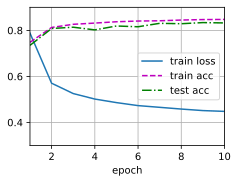

In [19]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

## 预测
现在训练已经完成，我们的模型已经准备好对图像进行分类预测。 给定一系列图像，我们将比较它们的实际标签（文本输出的第一行）和模型预测（文本输出的第二行）。

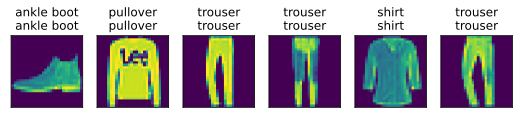

In [20]:
def predict_ch3(net, test_iter, n=6):  #@save
    """预测标签（定义见第3章）"""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)